In [22]:
# Import script untuk dataset dan model
from script import Dataset,Model

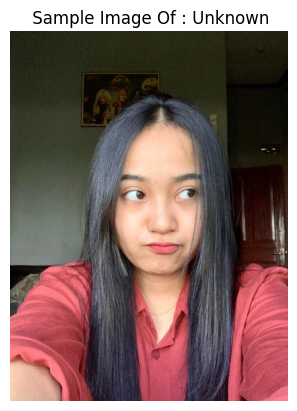

(1024, 768, 3)


In [23]:
# Inisiaisasi dataset dan melihat sample gambar yang ada
size={'train':0.7,'validation':0.1,'test':0.2}
dataset=Dataset('../Data/',image_size=(80,80),size=size)
img=dataset.getSample()

In [24]:
# Generate dataset yang telah dilakukan preprocessing untuk mendapatkan data training dan testing
x_train,y_train,x_valid,y_valid,x_test,y_test=dataset.generateDataset()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((873, 80, 80), (243, 80, 80), (873, 3), (243, 3))

In [25]:
import tensorflow as tf
#  Check if GPU is available and TensorFlow is using GPU
if tf.test.is_gpu_available():
    print("GPU is available")
    print("TensorFlow is using GPU")
else:
    print("GPU is not available")
    print("TensorFlow is using CPU")
    
# Create a TensorFlow session with GPU options
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

GPU is available
TensorFlow is using GPU


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\client\session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


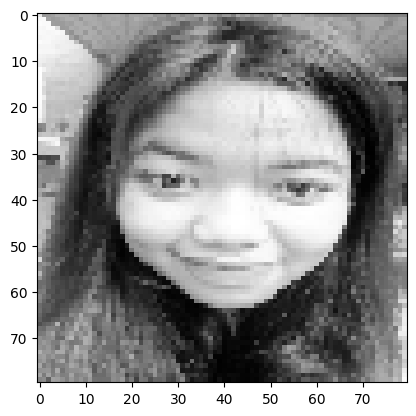

In [26]:
# Melihat Contoh gambar setelah dipreprocessing. Untuk melihat contoh lain, ganti index saja
import matplotlib.pyplot as plt
plt.imshow(x_train[14],cmap='gray')

# Training Model Menggunakan Data Latih dan Data Validasi Untuk Validasi Tiap Epoch

In [27]:
# Inisialisasi model dan melatih model menggunakan data sebelumnya
model=Model(label=dataset.idx_to_label)
model.trainModel(x_train,y_train,x_valid,y_valid,epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

# Pengujian Menggunakan Data Uji

In [28]:
# Mengevaluasi model setelah ditraining untuk mendapatkan akurasi pasti
model.evaluateModel(x_test,y_test)

8/8 [==============================] - 0s 7ms/step - loss: 0.1795 - accuracy: 0.9547


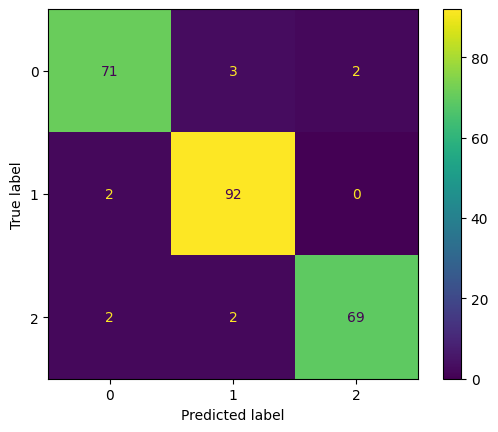

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
predicted=model.model.predict(x_test)
cf_score=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predicted,axis=1))
display=ConfusionMatrixDisplay(cf_score)
display.plot()

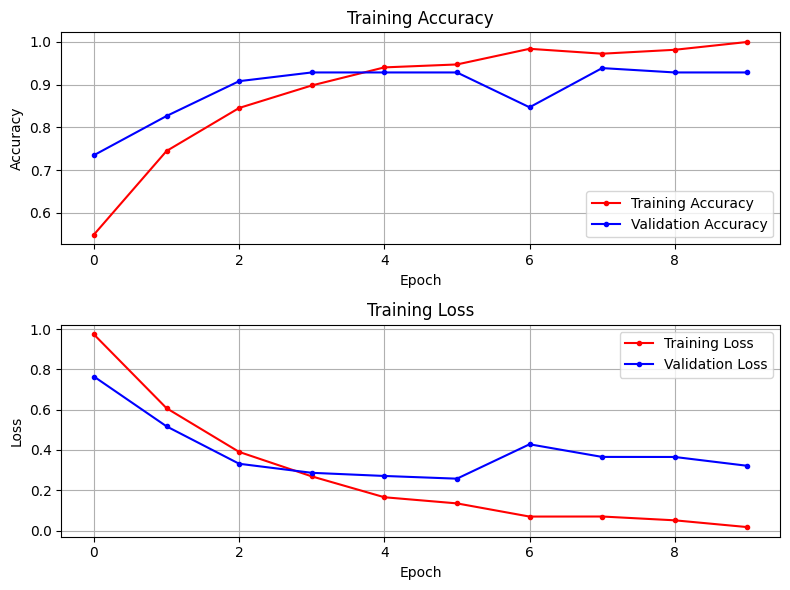

In [30]:
# Visualisasi hasil training model baik pada akurasi dan loss
model.plotTraining()

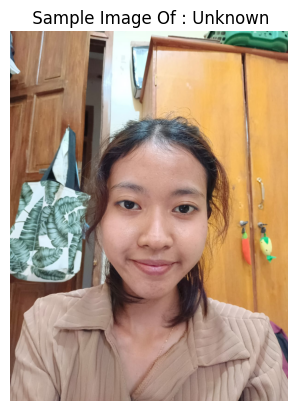

(1600, 1200, 3)


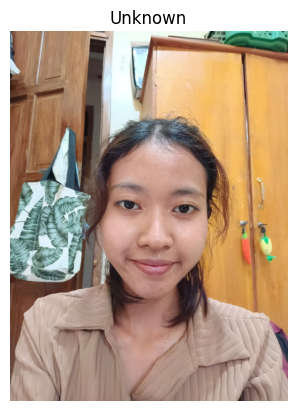

In [31]:
# Mencoba memprediksi model dengan data
model.predict(img=dataset.getSample())

In [32]:
# Melakukan real time prediksi
model.stream()